# Logistic Regression

Logistic Regression is a machine learning algorithm based on supervised learning. It performs a Classification task.

It predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. 
It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

## Wine Dataset
---

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report as cr,accuracy_score as ac

### Loading dataset

In [2]:
from sklearn import datasets 
wine = datasets.load_wine()

In [3]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

### Data Preprocessing

In [4]:
x=wine.data
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
y=wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
x.shape

(178, 13)

In [7]:
y.shape

(178,)

In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

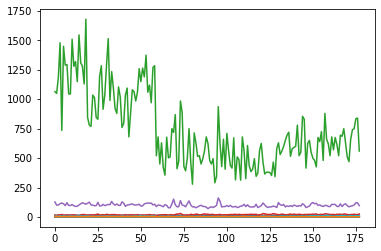

In [10]:
plt.plot(x)
plt.show()

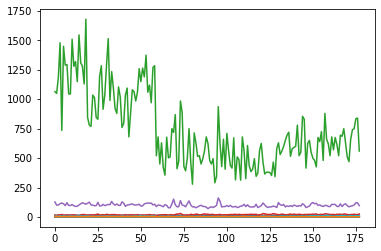

In [11]:
plt.plot(x)
plt.show()

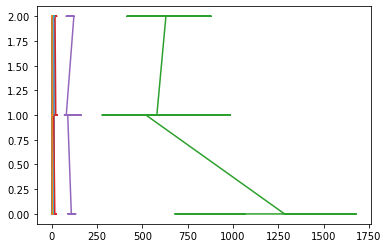

In [12]:
plt.plot(x,y)
plt.show()

### Splitting into Train and Test dataset

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=5)

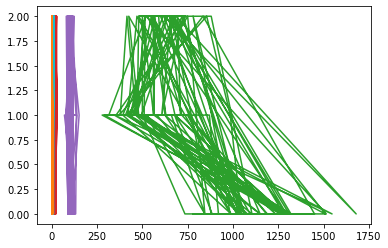

In [14]:
plt.plot(x_train,y_train)
plt.show()

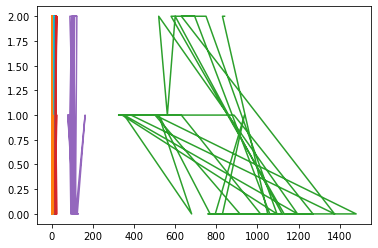

In [15]:
plt.plot(x_test,y_test)
plt.show()

### Creating a Logistic Regression Model

In [16]:
log = LogisticRegression()

### Train the Model

In [17]:
log.fit(x_train,y_train)

C:\Users\haris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predecting Target using Model

In [18]:
y_pre = log.predict(x_test)
y_pre

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2])

In [19]:
print((y_test))
print((y_pre))

[0 1 0 0 2 2 0 0 1 0 0 0 2 1 2 0 1 0 1 0 0 0 1 1 1 1 0 2 2 0 1 1 0 0 2 2]
[0 1 0 0 2 2 0 0 1 1 0 0 2 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 2 0 1 1 0 0 2 2]


### Performance Analysis of the Model

In [20]:
print("Training Score :", log.score(x_train,y_train)*100)

Training Score : 97.1830985915493


In [21]:
print("Testing Score :", log.score(x_test,y_test)*100)

Testing Score : 91.66666666666666


In [22]:
print("Accuracy Score :",ac(y_test,y_pre)*100)

Accuracy Score : 91.66666666666666


In [23]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pre))

Confusion Matrix
[[16  1  0]
 [ 0 11  0]
 [ 0  2  6]]


In [24]:
print("Classification Report")
print(cr(y_test,y_pre))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.79      1.00      0.88        11
           2       1.00      0.75      0.86         8

    accuracy                           0.92        36
   macro avg       0.93      0.90      0.90        36
weighted avg       0.93      0.92      0.92        36



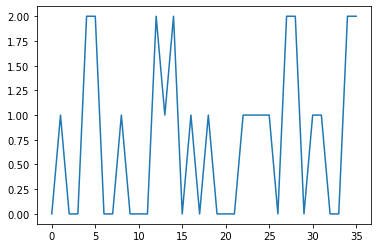

In [25]:
plt.plot(y_test)
plt.show()

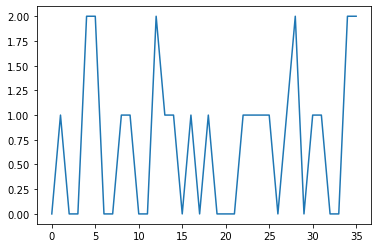

In [26]:
plt.plot(y_pre)
plt.show()

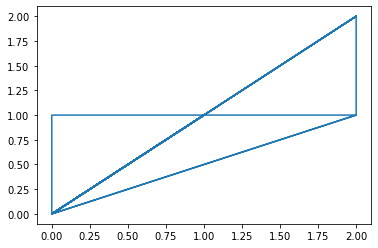

In [27]:
plt.plot(y_test,y_pre)
plt.show()

The Logistic Regression Model's accuracy is 91% calculated by Accuracy score. Hence our model is pretty good and ready to make new predictions for this classification problem.